🎓 Judul Proyek

Analisis Pengaruh Kebiasaan Gaya Hidup terhadap Performa Akademik Mahasiswa Menggunakan Machine Learning

🧩 Latar Belakang

Performa akademik mahasiswa sering dikaitkan dengan seberapa rajin mereka belajar, namun gaya hidup sehari-hari juga memiliki pengaruh besar terhadap hasil belajar. Pola tidur, penggunaan media sosial, aktivitas fisik, hingga kondisi mental dapat memengaruhi konsentrasi, produktivitas, dan hasil ujian akhir.

Dengan data yang mensimulasikan kebiasaan 1.000 mahasiswa secara realistis, kita dapat memanfaatkan pendekatan berbasis data untuk mengeksplorasi dan memahami bagaimana berbagai aspek kebiasaan ini saling berhubungan dan berdampak pada nilai akademik. Proyek ini bertujuan menjadi studi eksploratif dan prediktif untuk meningkatkan kesadaran pentingnya gaya hidup sehat dalam pendidikan.

🎯 Tujuan Proyek
1. Menyajikan gambaran umum mengenai kebiasaan gaya hidup mahasiswa, seperti durasi tidur, waktu belajar, penggunaan media sosial, dan aktivitas harian lainnya, serta hubungannya dengan performa akademik (exam score).

2. Melakukan eksplorasi data (EDA) untuk mengidentifikasi pola atau korelasi antara gaya hidup—khususnya jam tidur, penggunaan media sosial, dan durasi belajar—dengan nilai ujian akhir mahasiswa.

3. Membangun model klasifikasi machine learning untuk memprediksi apakah seorang mahasiswa memiliki performa akademik tinggi atau rendah, berdasarkan indikator kebiasaan harian mereka seperti waktu menonton Netflix, tidur, belajar, dan penggunaan media sosial.

4. Mengevaluasi apakah kebiasaan menggunakan media sosial, seperti TikTok dan Instagram, memiliki pengaruh signifikan terhadap performa akademik, serta membandingkannya dengan faktor-faktor gaya hidup lainnya.

5. Menghasilkan insight dan rekomendasi berbasis data yang dapat digunakan untuk membantu mahasiswa memperbaiki kebiasaan harian agar lebih mendukung pencapaian akademik yang optimal.

💻 Step-by-Step Proyek Google Colab

✅ Step 1: Instalasi dan Impor Library

In [3]:
!pip install -q kagglehub

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

✅ Step 2: Unduh dan Muat Dataset

In [4]:
# Unduh dataset dari Kaggle
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")

# Tampilkan file yang tersedia
print("Path dataset:", path)
print(os.listdir(path))

# Baca file CSV
df = pd.read_csv(os.path.join(path, 'student_habits_performance.csv'))

# Tampilkan 5 baris pertama
df.head()

Path dataset: /kaggle/input/student-habits-vs-academic-performance
['student_habits_performance.csv']


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


✅ Step 3: Pemeriksaan Awal Dataset

In [5]:
# Mengecek Berapa dimensi dari data
print("Dimensi data:", df.shape)

Dimensi data: (1000, 16)


In [ ]:
# Mengecek tipe dari data di setiap kolom
print("\nTipe data setiap kolom:\n", df.dtypes)


Tipe data setiap kolom:
 student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
performance                        int64
dtype: object


In [ ]:
# Cek nilai unik dan distribusi data kategorikal
print("\nKolom kategorikal:\n")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Kolom kategorikal:

student_id: ['S1000' 'S1001' 'S1002' 'S1003' 'S1004' 'S1005' 'S1006' 'S1007' 'S1008'
 'S1009' 'S1010' 'S1011' 'S1012' 'S1013' 'S1014' 'S1015' 'S1016' 'S1017'
 'S1018' 'S1019' 'S1020' 'S1021' 'S1022' 'S1023' 'S1024' 'S1025' 'S1026'
 'S1027' 'S1028' 'S1029' 'S1030' 'S1031' 'S1032' 'S1033' 'S1034' 'S1035'
 'S1036' 'S1037' 'S1038' 'S1039' 'S1040' 'S1041' 'S1042' 'S1043' 'S1044'
 'S1045' 'S1046' 'S1047' 'S1048' 'S1049' 'S1050' 'S1051' 'S1052' 'S1053'
 'S1054' 'S1055' 'S1056' 'S1057' 'S1058' 'S1059' 'S1060' 'S1061' 'S1062'
 'S1063' 'S1064' 'S1065' 'S1066' 'S1067' 'S1068' 'S1069' 'S1070' 'S1071'
 'S1072' 'S1073' 'S1074' 'S1075' 'S1076' 'S1077' 'S1078' 'S1079' 'S1080'
 'S1081' 'S1082' 'S1083' 'S1084' 'S1085' 'S1086' 'S1087' 'S1088' 'S1089'
 'S1090' 'S1091' 'S1092' 'S1093' 'S1094' 'S1095' 'S1096' 'S1097' 'S1098'
 'S1099' 'S1100' 'S1101' 'S1102' 'S1103' 'S1104' 'S1105' 'S1106' 'S1107'
 'S1108' 'S1109' 'S1110' 'S1111' 'S1112' 'S1113' 'S1114' 'S1115' 'S1116'
 'S1117' 'S1118' '

✅ Step 4: Pembersihan Data

In [ ]:
# Cek missing value
print("Missing values:\n", df.isnull().sum())

Missing values:
 student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
performance                      0
dtype: int64


In [ ]:
# Tampilkan kolom yang punya missing values
missing = df.isnull().sum()
print("\nKolom dengan missing:\n", missing[missing > 0])


Kolom dengan missing:
 Series([], dtype: int64)


In [ ]:
# Cek jumlah data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())

# Hapus duplikat
df.drop_duplicates(inplace=True)


Jumlah data duplikat: 0


In [ ]:
# Tangani missing values (isi parental_education_level dengan modus)
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

In [ ]:
# Verifikasi ulang
print("\nMissing setelah dibersihkan:\n", df.isnull().sum())


Missing setelah dibersihkan:
 student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
performance                      0
dtype: int64


In [ ]:
# Mengecek dimensi dari data setelah dibersihkan
print("Dimensi data setelah dibersihkan:", df.shape)

Dimensi data setelah dibersihkan: (1000, 17)


✅ Step 5: Pemeriksaan Tipe Data

In [ ]:
# Ubah kolom menjadi numerik atau kategorikal
print(df.dtypes)

student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object


In [ ]:
# Daftar kolom object yang akan diubah ke kategori
categorical_columns = [
    'student_id',
    'gender',
    'part_time_job',
    'diet_quality',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation'
]

# Ubah ke kategori
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verifikasi tipe data setelah perubahan
print(df.dtypes)

student_id                       category
age                                 int64
gender                           category
study_hours_per_day               float64
social_media_hours                float64
netflix_hours                     float64
part_time_job                    category
attendance_percentage             float64
sleep_hours                       float64
diet_quality                     category
exercise_frequency                  int64
parental_education_level         category
internet_quality                 category
mental_health_rating                int64
extracurricular_participation    category
exam_score                        float64
performance                         int64
dtype: object


✅ Step 6: Exploratory Data Analysis (EDA) + Insight

In [ ]:
# Statistika deskriptif
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,performance
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500,0.511000
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564,0.500129
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000,0.000000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000,0.000000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000,1.000000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000,1.000000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000,1.000000


Berdasarkan analisis statistik deskriptif, terlihat bahwa rentang usia mahasiswa berkisar antara 17 hingga 24 tahun, dengan rata-rata sekitar 20,5 tahun, menunjukkan bahwa mayoritas mahasiswa berada pada usia tipikal pendidikan tinggi awal. Rata-rata waktu belajar mahasiswa adalah sekitar 3,55 jam per hari, dengan variasi cukup besar karena ada yang tidak belajar sama sekali hingga yang belajar lebih dari 8 jam per hari. Sementara itu, penggunaan media sosial dan Netflix juga cukup signifikan, masing-masing rata-rata 2,5 dan 1,8 jam per hari, dengan sebagian mahasiswa menghabiskan waktu yang sangat tinggi untuk aktivitas hiburan ini. Tingkat kehadiran menunjukkan nilai rata-rata 84,13%, mengindikasikan bahwa sebagian besar mahasiswa cukup konsisten hadir di kelas, meskipun ada yang kehadirannya sangat rendah. Dalam hal jam tidur, mahasiswa tidur rata-rata 6,47 jam per malam dengan sebagian kecil mengalami kekurangan tidur. Frekuensi olahraga menunjukkan rata-rata tiga kali seminggu, menandakan bahwa sebagian besar mahasiswa memiliki aktivitas fisik yang cukup teratur. Rating kesehatan mental berada pada angka rata-rata 5,44 dari skala 1–10, menunjukkan persepsi yang beragam terhadap kondisi mental mereka dengan standar deviasi yang besar. Nilai ujian rata-rata berada di angka 69,6 dari maksimum 100, dengan rentang nilai yang cukup luas dan distribusi yang merata. Terakhir, performa mahasiswa yang direpresentasikan dalam bentuk biner (0 dan 1) menunjukkan bahwa sekitar 51% mahasiswa dikategorikan berperforma baik, menjadikan distribusinya cukup seimbang dan potensial untuk keperluan klasifikasi dalam model analitik atau pembelajaran mesin.

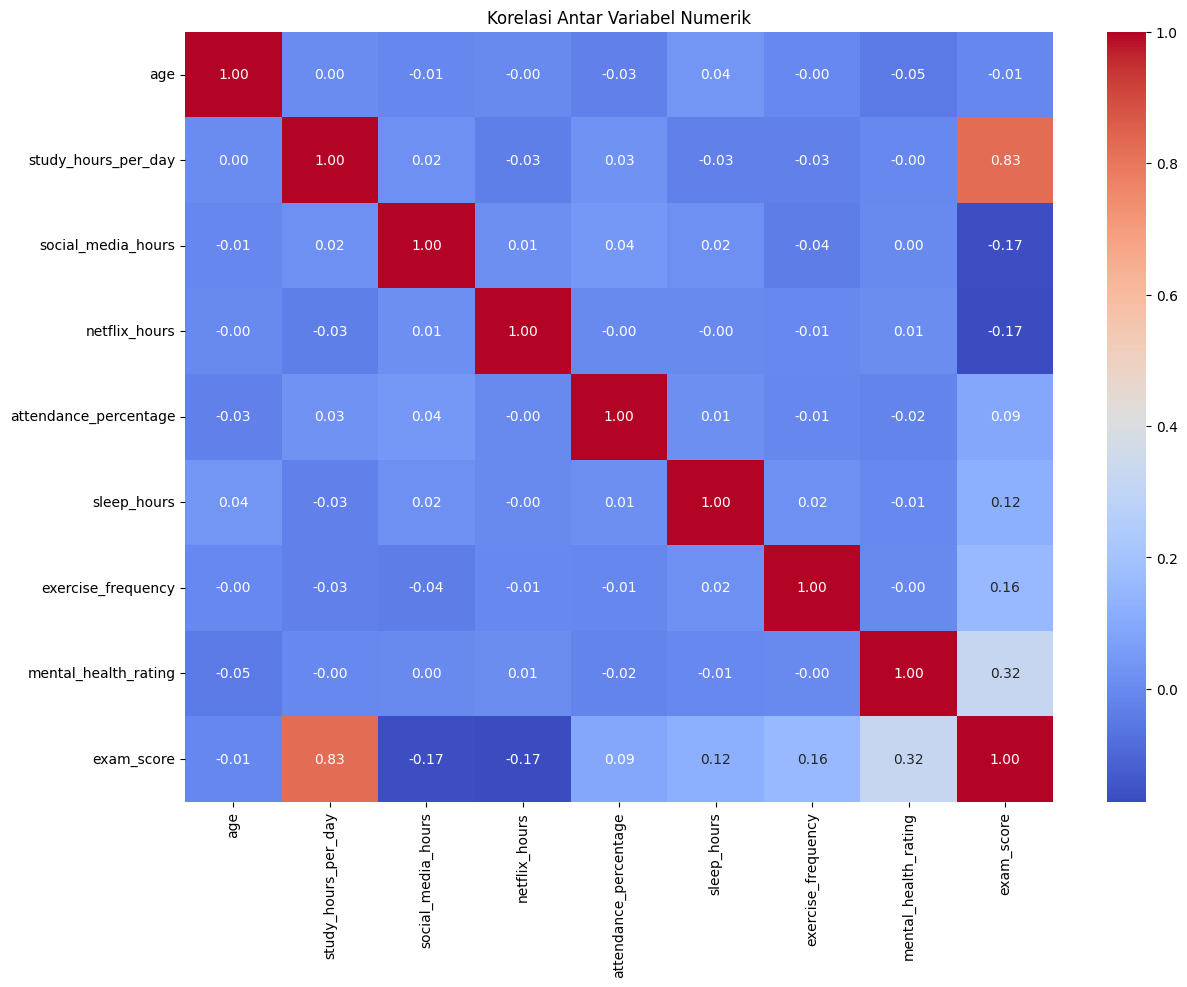

In [ ]:
# Korelasi fitur numerik
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

💡 Insight:
1. Hubungan antara waktu belajar per hari dengan nilai ujian (korelasi = 0.83)
Terdapat hubungan yang sangat kuat dan positif antara jumlah jam belajar per hari dengan nilai ujian mahasiswa. Korelasi sebesar 0.83 menunjukkan bahwa semakin banyak waktu yang dihabiskan untuk belajar, maka semakin tinggi pula kemungkinan mahasiswa mendapatkan nilai ujian yang baik. Hal ini menegaskan pentingnya kebiasaan belajar yang konsisten dan terstruktur. Temuan ini juga dapat digunakan sebagai dasar untuk menyarankan mahasiswa agar meningkatkan intensitas belajarnya sebagai strategi peningkatan performa akademik. Namun, korelasi ini hanya menggambarkan kuantitas belajar, bukan kualitasnya, sehingga tetap dibutuhkan pendekatan yang holistik.

2. Kesehatan mental dan pengaruhnya terhadap nilai ujian (korelasi = 0.32)
Korelasi sebesar 0.32 antara penilaian kesehatan mental dan nilai ujian menunjukkan adanya hubungan positif yang sedang. Artinya, mahasiswa dengan kondisi mental yang lebih baik cenderung memperoleh nilai ujian yang lebih tinggi. Walaupun tidak sekuat pengaruh waktu belajar, hal ini mengindikasikan bahwa kesejahteraan mental tetap berperan penting dalam mendukung pencapaian akademik. Insight ini menyoroti perlunya perhatian terhadap aspek psikologis mahasiswa, karena kesehatan mental yang stabil dapat menunjang proses belajar yang lebih optimal.

3. Frekuensi olahraga dan hubungannya dengan nilai ujian (korelasi = 0.16)
Terdapat korelasi positif kecil antara frekuensi olahraga dengan nilai ujian, yaitu sebesar 0.16. Meskipun pengaruhnya tidak terlalu kuat, data ini mengisyaratkan bahwa aktivitas fisik secara rutin mungkin dapat membantu menjaga keseimbangan hidup dan berkontribusi terhadap performa akademik. Aktivitas fisik bisa berperan dalam meningkatkan konsentrasi, suasana hati, serta kebugaran, yang secara tidak langsung mendukung keberhasilan belajar.

4. Durasi tidur dan pengaruhnya terhadap nilai ujian (korelasi = 0.12)
Hubungan antara durasi tidur dan nilai ujian menunjukkan korelasi positif yang kecil, sebesar 0.12. Ini berarti bahwa tidur yang cukup memang memiliki manfaat bagi pencapaian akademik, namun bukan merupakan faktor penentu utama. Tidur yang teratur mungkin membantu meningkatkan fokus dan konsentrasi, meski pengaruhnya terhadap nilai ujian dalam dataset ini tidak terlalu signifikan.

5. Pengaruh waktu penggunaan media sosial dan Netflix terhadap nilai ujian (korelasi = -0.17)
Terdapat korelasi negatif kecil antara jumlah waktu yang dihabiskan untuk media sosial maupun Netflix dengan nilai ujian, keduanya sebesar -0.17. Artinya, semakin sering mahasiswa menggunakan waktu mereka untuk media hiburan ini, cenderung nilai ujiannya sedikit menurun. Meskipun korelasinya tidak besar, temuan ini dapat menjadi indikator awal bahwa distraksi digital seperti media sosial dan layanan streaming dapat berdampak buruk terhadap fokus belajar dan pencapaian akademik.

Statistik Deskriptif untuk 'sleep_hours':


,sleep_hours
count,1000.000000
mean,6.470100
std,1.226377
min,3.200000
25%,5.600000
50%,6.500000
75%,7.300000
max,10.000000


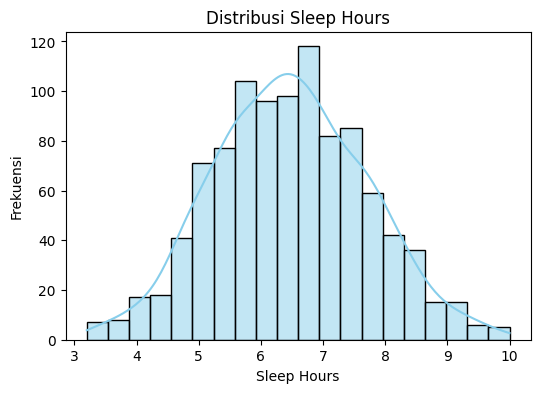

In [ ]:
# Menampilkan statistik deskriptif dari jam tidur
print("Statistik Deskriptif untuk 'sleep_hours':")
display(df['sleep_hours'].describe())

plt.figure(figsize=(6, 4))
sns.histplot(df['sleep_hours'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frekuensi')
plt.show()

Distribusi jam tidur menunjukkan bahwa mayoritas mahasiswa tidur selama 6 hingga 7 jam per hari. Sementara itu, frekuensi paling rendah terdapat pada durasi tidur ekstrem, yaitu hanya 3–4 jam atau hingga 10 jam per hari.

Distribusi ini membentuk pola menyerupai kurva normal, yang menandakan bahwa mayoritas responden memiliki pola tidur yang tergolong moderat.

Statistik Deskriptif untuk 'study_hours_per_day':


,study_hours_per_day
count,1000.00000
mean,3.55010
std,1.46889
min,0.00000
25%,2.60000
50%,3.50000
75%,4.50000
max,8.30000


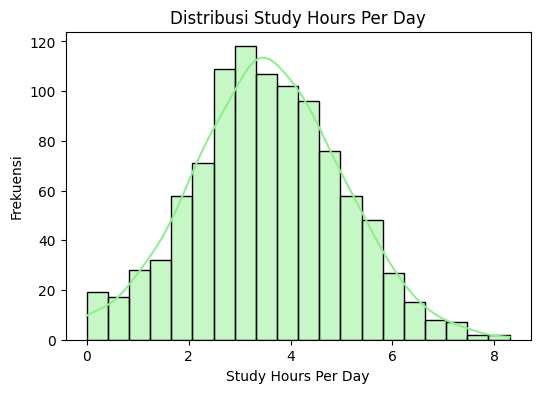

In [ ]:
# Menampilkan statistik deskriptif dari jam belajar
print("Statistik Deskriptif untuk 'study_hours_per_day':")
display(df['study_hours_per_day'].describe())

plt.figure(figsize=(6, 4))
sns.histplot(df['study_hours_per_day'], bins=20, kde=True, color='lightgreen')
plt.title('Distribusi Study Hours Per Day')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Frekuensi')
plt.show()

Distribusi jam belajar per hari menunjukkan bahwa sebagian besar responden belajar selama 2 hingga 4 jam per hari. Sementara itu, sangat sedikit responden yang belajar hingga 8 jam per hari, menjadikannya frekuensi terendah dalam distribusi ini.

Distribusi ini menyerupai bentuk kurva normal, yang mengindikasikan bahwa pola belajar responden cenderung terkonsentrasi di jam-jam moderat.

Statistik Deskriptif untuk 'social_media_hours':


,social_media_hours
count,1000.000000
mean,2.505500
std,1.172422
min,0.000000
25%,1.700000
50%,2.500000
75%,3.300000
max,7.200000


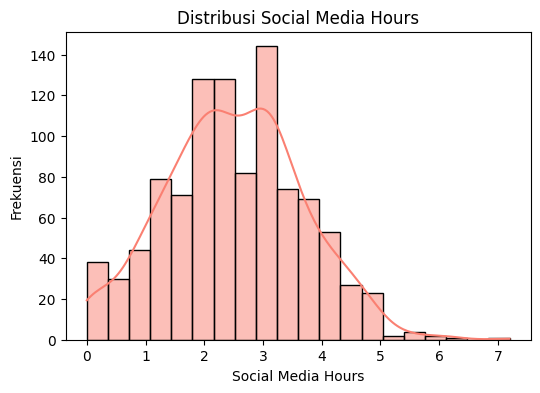

In [ ]:
# Menampilkan statistik deskriptif dari jam bermain sosial media
print("Statistik Deskriptif untuk 'social_media_hours':")
display(df['social_media_hours'].describe())

plt.figure(figsize=(6, 4))
sns.histplot(df['social_media_hours'], bins=20, kde=True, color='salmon')
plt.title('Distribusi Social Media Hours')
plt.xlabel('Social Media Hours')
plt.ylabel('Frekuensi')
plt.show()

Distribusi durasi penggunaan media sosial menunjukkan bahwa sebagian besar responden menghabiskan waktu 2 hingga 3 jam per hari di media sosial, dengan frekuensi tertinggi berada pada rentang tersebut. Sementara itu, hanya sedikit responden yang menggunakan media sosial lebih dari 5 jam per hari.

Hal ini mengindikasikan bahwa penggunaan media sosial cukup intens di kalangan responden, namun masih dalam batas yang relatif wajar bagi mayoritas.

Statistik Deskriptif untuk 'netflix_hours':


,netflix_hours
count,1000.000000
mean,1.819700
std,1.075118
min,0.000000
25%,1.000000
50%,1.800000
75%,2.525000
max,5.400000


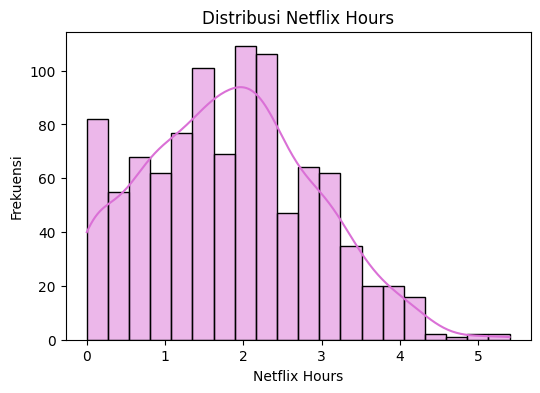

In [ ]:
# Menampilkan statistik deskriptif dari jam menonton netflix
print("Statistik Deskriptif untuk 'netflix_hours':")
display(df['netflix_hours'].describe())

plt.figure(figsize=(6, 4))
sns.histplot(df['netflix_hours'], bins=20, kde=True, color='orchid')
plt.title('Distribusi Netflix Hours')
plt.xlabel('Netflix Hours')
plt.ylabel('Frekuensi')
plt.show()

Distribusi durasi menonton Netflix menunjukkan bahwa sebagian besar responden menonton selama 0 hingga 3 jam per hari, dengan puncaknya pada kisaran 2 jam. Sementara itu, hanya sedikit responden yang menonton lebih dari 4 jam per hari, dengan titik terendah pada kisaran 5 jam.

Hal ini menunjukkan bahwa kebiasaan menonton Netflix cenderung moderat di kalangan responden, dengan sebagian besar menonton dalam durasi yang masih terbilang wajar setiap harinya.

Statistik Deskriptif untuk 'mental_health_rating':


,mental_health_rating
count,1000.000000
mean,5.438000
std,2.847501
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


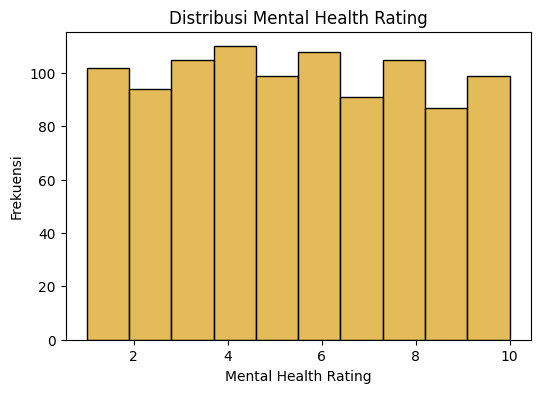

In [ ]:
# Menampilkan statistik deskriptif dari rating kesehatan mental
print("Statistik Deskriptif untuk 'mental_health_rating':")
display(df['mental_health_rating'].describe())

plt.figure(figsize=(6, 4))
sns.histplot(df['mental_health_rating'], bins=10, kde=False, color='goldenrod')
plt.title('Distribusi Mental Health Rating')
plt.xlabel('Mental Health Rating')
plt.ylabel('Frekuensi')
plt.show()

Distribusi mental health rating menunjukkan penyebaran yang relatif merata dari rating 1 hingga 10. Frekuensi masing-masing nilai berkisar antara 90 hingga 110, menandakan bahwa tidak ada rating tertentu yang mendominasi. Hal ini mengindikasikan persebaran penilaian kesehatan mental mahasiswa yang cenderung seimbang di seluruh rentang.

Dengan distribusi yang merata ini, dapat diasumsikan bahwa persepsi mahasiswa terhadap kondisi mental mereka cukup beragam, tanpa adanya kecenderungan signifikan ke arah penilaian sangat rendah maupun sangat tinggi.

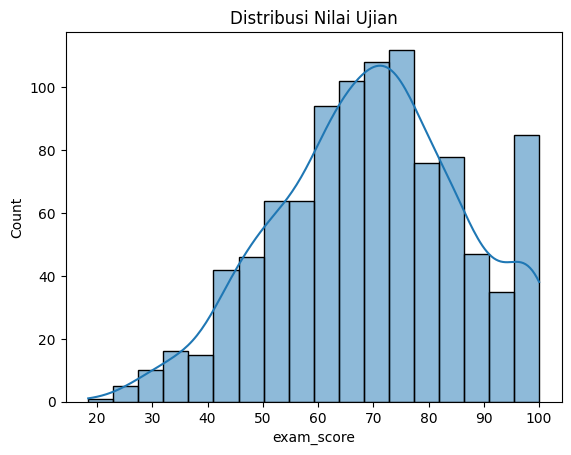

In [ ]:
# Distribusi nilai ujian
sns.histplot(df['exam_score'], kde=True)
plt.title('Distribusi Nilai Ujian')
plt.show()

Distribusi nilai ujian mahasiswa cenderung terkonsentrasi pada rentang 60 hingga 80, dengan jumlah mahasiswa dalam rentang ini mencapai lebih dari 100 orang. Grafik menunjukkan pola distribusi yang mendekati normal dengan sedikit kemiringan ke kiri (left-skewed), menandakan bahwa sebagian besar mahasiswa memperoleh nilai ujian sedang hingga tinggi.

Artinya, sebagian besar mahasiswa memiliki performa akademik yang cukup baik, meskipun masih ada sebagian kecil mahasiswa yang nilainya berada di bawah 50 atau sangat tinggi di atas 90.

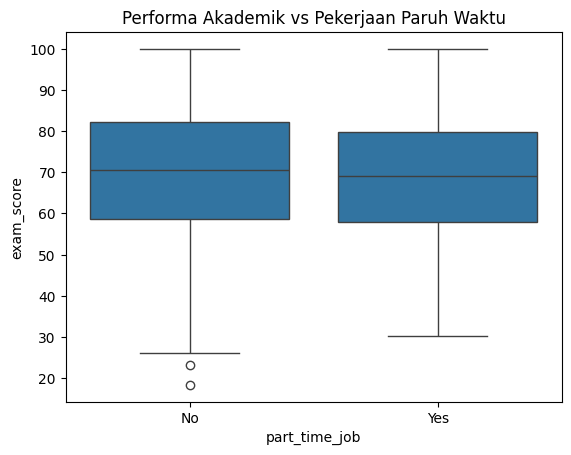

In [ ]:
# Performa berdasarkan pekerjaan paruh waktu
sns.boxplot(x='part_time_job', y='exam_score', data=df)
plt.title('Performa Akademik vs Pekerjaan Paruh Waktu')
plt.show()

Mahasiswa yang tidak bekerja cenderung memiliki nilai ujian sedikit lebih tinggi secara median. Namun, bekerja paruh waktu tidak secara drastis menurunkan nilai, sehingga dampaknya mungkin tidak terlalu signifikan. Tetap, ini menunjukkan bahwa waktu dan fokus belajar bisa sedikit terganggu bagi mahasiswa yang bekerja sambil kuliah.

✅ Step 7: Persiapan Data untuk Machine Learning

In [ ]:
# Buat target biner: nilai >= 70 dianggap performa tinggi
df['performance'] = df['exam_score'].apply(lambda x: 1 if x >= 70 else 0)

# Drop kolom yang tidak relevan
df_model = df.drop(['student_id', 'exam_score'], axis=1)

# Label encoding untuk kolom kategorikal
le = LabelEncoder()
for col in df_model.select_dtypes(include='category').columns:
    df_model[col] = le.fit_transform(df_model[col])

# Pisahkan fitur dan target
X = df_model.drop('performance', axis=1)
y = df_model['performance']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

✅ Step 8: Pelatihan Model Machine Learning

In [ ]:
# Gunakan Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84        95
           1       0.87      0.82      0.84       105

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

Confusion Matrix:
 [[82 13]
 [19 86]]


Model memiliki akurasi sebesar 84%, dengan precision dan recall yang cukup seimbang antara mahasiswa dengan nilai ujian tinggi dan rendah. Ini menunjukkan bahwa kebiasaan gaya hidup dalam dataset cukup informatif untuk memprediksi performa akademik.

✅ Step 9: Kesimpulan, Insight Akhir, dan Rekomendasi

🔍 Insight:

- Jam Belajar per Hari (Study Hours per Day):

Faktor ini memiliki korelasi tertinggi terhadap nilai ujian, yaitu sebesar +0.83. Artinya, semakin banyak mahasiswa belajar setiap hari, semakin tinggi kemungkinan mereka meraih nilai ujian yang lebih baik.

- Kesehatan Mental (Mental Health Rating):

Korelasi positif sebesar +0.32 menunjukkan bahwa mahasiswa dengan kesehatan mental yang lebih baik cenderung meraih nilai ujian yang lebih tinggi. Ini mempertegas pentingnya kondisi psikologis dalam mendukung pencapaian akademik.

- Frekuensi Olahraga (Exercise Frequency):

Meski tidak sekuat dua faktor sebelumnya, olahraga tetap menunjukkan hubungan positif terhadap nilai ujian (+0.16), menandakan bahwa gaya hidup aktif mendukung performa akademik.

- Jam Tidur (Sleep Hours):

Memiliki korelasi +0.12, menunjukkan bahwa tidur cukup masih memiliki kontribusi terhadap nilai ujian, meskipun tidak terlalu signifikan. Rata-rata mahasiswa tidur selama 6,47 jam, di bawah rekomendasi ideal 7–9 jam.

- Persentase Kehadiran (Attendance Percentage):

Dengan korelasi rendah sekitar +0.09, kehadiran tinggi belum tentu berdampak langsung pada nilai. Ini mengindikasikan bahwa sekadar hadir tidak cukup tanpa pembelajaran aktif.

- Waktu Menonton Netflix (Netflix Hours):

Korelasi negatif sebesar -0.17 menunjukkan bahwa konsumsi hiburan berlebihan dapat menurunkan performa ujian, terutama jika tidak diimbangi dengan waktu belajar yang cukup.

- Waktu Bermedia Sosial (Social Media Hours):

Juga memiliki korelasi negatif yang sama yaitu -0.17, memperlihatkan bahwa penggunaan media sosial yang berlebihan bisa menjadi gangguan terhadap pencapaian akademik.

- Sebaran Performa Akhir (Performance):

Data menunjukkan distribusi hampir seimbang antara performa baik (1) dan kurang (0), menjadikan data ini cocok untuk klasifikasi biner dalam model prediktif berbasis kebiasaan belajar dan gaya hidup.

- Variasi Gaya Hidup dan Kondisi Mahasiswa:

Nilai standar deviasi tinggi pada variabel seperti kesehatan mental dan olahraga menunjukkan bahwa mahasiswa memiliki kebiasaan dan kondisi yang sangat bervariasi, yang bisa mempengaruhi cara mereka meraih prestasi.


🧠 Kesimpulan:

Performa akademik mahasiswa paling dipengaruhi oleh jam belajar per hari, yang secara signifikan berkorelasi dengan nilai ujian. Faktor pendukung seperti kesehatan mental, olahraga, dan tidur cukup juga memainkan peran penting, meski dalam skala lebih kecil. Sementara itu, waktu untuk hiburan seperti media sosial dan Netflix justru cenderung mengurangi performa akademik jika dilakukan secara berlebihan. Meskipun tingkat kehadiran cukup tinggi, keberhasilan akademik lebih ditentukan oleh usaha mandiri dan kebiasaan sehari-hari mahasiswa. Variasi gaya hidup dan kondisi tiap individu menambah kompleksitas dalam analisis ini, namun sekaligus membuka peluang untuk pendekatan yang lebih personal dalam peningkatan prestasi.

🧭 REKOMENDASI BERDASARKAN INSIGHT & KESIMPULAN

1. Tingkatkan Durasi dan Kualitas Belajar:

Mahasiswa disarankan untuk memiliki rutinitas belajar harian minimal 3–4 jam yang terfokus, karena faktor ini memiliki pengaruh terbesar terhadap nilai ujian.

2. Perkuat Dukungan Kesehatan Mental:

Institusi pendidikan perlu menyediakan layanan psikologis dan program peningkatan kesadaran kesehatan mental agar mahasiswa dapat menjaga kestabilan emosionalnya.

3. Fasilitasi Gaya Hidup Sehat dan Aktif:

Mahasiswa perlu didorong untuk menjaga kebugaran dengan rutin berolahraga dan tidur cukup. Hal ini bisa difasilitasi lewat kebijakan kampus seperti jam belajar fleksibel atau penyediaan sarana olahraga.

4. Kurangi Konsumsi Hiburan Berlebihan:

Penggunaan media sosial dan platform hiburan seperti Netflix perlu dibatasi agar tidak mengganggu waktu belajar. Edukasi tentang manajemen waktu digital bisa sangat membantu.

5. Dorong Pembelajaran Aktif dan Mandiri:

Kehadiran kelas harus disertai strategi pembelajaran aktif agar lebih berdampak pada hasil belajar, seperti diskusi kelompok, tugas berbasis proyek, atau flipped classroom.

6. Gunakan Data sebagai Dasar Sistem Deteksi Dini:

Dengan pola ini, institusi bisa membangun sistem prediksi performa akademik untuk memberikan dukungan dini bagi mahasiswa yang berisiko mengalami penurunan nilai.

7. Sesuaikan Program Akademik dan Non-akademik dengan Realita Mahasiswa:

Karena gaya hidup mahasiswa sangat beragam, pendekatan fleksibel dan berbasis kebutuhan aktual akan jauh lebih efektif dibanding pendekatan seragam yang kaku.